In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip
!pip3 install pyproj==1.9.6
!pip3 install zip
!pip3 install geopandas
!pip3 install pyproj==2.5.0

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -q "/content/drive/My Drive/data/novel-corona-virus-2019-dataset.zip"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from torch import nn


In [0]:
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv", delimiter=',', skiprows=0, low_memory=False)
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv", delimiter=',', skiprows=0, low_memory=False)
df_confirmed = pd.read_csv("/content/time_series_covid_19_confirmed.csv", delimiter=',', skiprows=0, low_memory=False)

In [52]:
print(df_deaths.head())
df_recovered.head()

  Province/State  Country/Region      Lat  ...  3/9/20  3/10/20  3/11/20
0          Anhui  Mainland China  31.8257  ...       6        6      NaN
1        Beijing  Mainland China  40.1824  ...       8        8      NaN
2      Chongqing  Mainland China  30.0572  ...       6        6      NaN
3         Fujian  Mainland China  26.0789  ...       1        1      NaN
4          Gansu  Mainland China  36.0611  ...       2        2      0.0

[5 rows x 54 columns]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,2,2,3,5,7,14,20,23,34,47,59,72,88,105,127,157,193,221,255,280,361,413,474,539,597,637,663,712,744,792,821,868,873,917,936,956,970,979,979,984,984,984,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,4,4,4,5,9,9,12,23,24,31,33,34,37,44,48,56,69,80,98,108,114,122,145,153,169,178,189,198,215,235,248,257,271,276,282,288,297,297,299,303,308,315,320,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,1,1,1,3,7,9,9,15,24,31,39,51,66,79,102,128,152,184,207,225,254,274,299,316,328,335,349,372,384,401,422,438,450,469,490,502,512,513,526,527,542,547,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,1,3,11,14,20,24,35,39,45,53,57,63,71,82,90,93,112,126,149,162,170,183,199,218,228,235,243,247,255,260,270,277,284,295,295,295,295,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,3,3,4,6,6,9,12,16,17,24,31,39,39,49,54,58,62,65,71,76,76,78,80,80,81,81,82,82,84,85,86,87,87,87,87,87,88,88,0.0


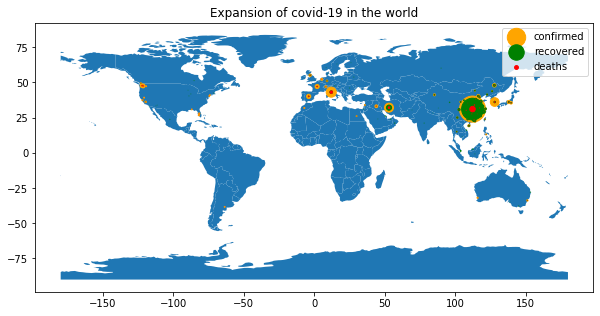

In [95]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import numpy as np
import math 
df_recovered = df_recovered.sort_values('3/10/20',ascending=False)
df_recovered = df_recovered.loc[df_recovered['3/10/20']!=0]

df_deaths = df_deaths.sort_values('3/10/20',ascending=False)
df_deaths = df_deaths.loc[df_deaths['3/10/20']!=0]

df_confirmed = df_confirmed.sort_values('3/10/20',ascending=False)
df_confirmed = df_confirmed.loc[df_confirmed['3/10/20']!=0]

geometry_recovered = [Point(xy) for xy in zip(df_recovered['Long'], df_recovered['Lat'])]
geometry_deaths = [Point(xy) for xy in zip(df_deaths['Long'], df_deaths['Lat'])]
geometry_confirmed = [Point(xy) for xy in zip(df_confirmed['Long'], df_confirmed['Lat'])]

gdf_recovered = GeoDataFrame(df_recovered, geometry=geometry_recovered) 
gdf_deaths = GeoDataFrame(df_deaths, geometry=geometry_deaths)   
gdf_confirmed = GeoDataFrame(df_confirmed, geometry=geometry_confirmed)   

total = len(df_recovered.loc[:,'3/10/20'].index)

s_recovered = [df_recovered.iloc[n]['3/10/20']/100 for n in range(len(list(np.sort(df_recovered.loc[:,'3/10/20']))))]

s_deaths = [df_deaths.iloc[n]['3/10/20']/100 for n in range(len(list(np.sort(df_deaths.loc[:,'3/10/20']))))]

s_confirmed = [df_confirmed.iloc[n]['3/10/20']/100 for n in range(len(list(np.sort(df_confirmed.loc[:,'3/10/20']))))]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
confirmed = gdf_deaths.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='orange', markersize=s_confirmed)
recovered = gdf_recovered.plot(ax=confirmed, marker='o', color='green', markersize=s_recovered)
deaths = gdf_deaths.plot(ax=recovered, marker='o', color='red', markersize=s_deaths)
plt.title("Expansion of covid-19 in the world")
plt.legend(["confirmed","recovered","deaths"])
plt.show()

In [0]:
z